In [42]:
from selenium import webdriver
import pandas as pd
import os
browser = webdriver.Chrome('chromedriver.exe')

In [52]:
url = 'https://in.linkedin.com/jobs/search?keywords=data+science&location=&locationId=PLACES.in.16-0'
browser.get(url)

In [54]:
parents = browser.find_elements_by_css_selector('li.jobs-search-result-item')
len(parents)

25

In [57]:
df=pd.DataFrame()
for job in parents:
    
    designation=job.find_element_by_css_selector('h3.listed-job-posting__title').text
    cname=job.find_element_by_css_selector('h4.listed-job-posting__company').text
    location=job.find_element_by_css_selector('p.listed-job-posting__location').text
    date=job.find_element_by_css_selector('div.listed-job-posting__flavors>span.listed-job-posting__flavor.posted-time-ago__text').text
    jd=job.find_element_by_css_selector('div.listed-job-posting__description-container>p.listed-job-posting__description').text
    curr_row = {'Designation':designation, 'Company Name':cname, 'Location':location, 'Date':date, 'Job Description':jd}
    df=df.append(curr_row, ignore_index=True)
df

,Company Name,Date,Designation,Job Description,Location
0,Amazon,6 hours ago,Senior Data Scientist,"If you have experience with AI, including buil...",Bengaluru
1,Gambit Sports,2 weeks ago,Data Scientist,We are looking for a data scientist who will b...,Anekal
2,"Group 42, Inc.",1 month ago,Data Science Engineer,2+ years' experience in AI and ML algorithm de...,Bengaluru
3,IBM India Private Limited,6 days ago,Data Science Specialist,Required Technical and Professional Expertise ...,Bengaluru
4,Accenture in India,2 days ago,Data Science Specialist,This role will be based in Bangalore.We are lo...,Bengaluru
5,Koinex.in,1 week ago,Data Science Lead,An ideal candidate will be someone who has a g...,Bengaluru
6,JDA Software,1 day ago,Data Science Consultant _ Consulting Services,JDA enables an Autonomous Supply ChainTM by co...,Anekal
7,Genpact,8 hours ago,Data Scientist,Solid communication skills with exposure to di...,Anekal
8,Autodesk,7 hours ago,Data Architect,Strong technical skills in best of class techn...,Bengaluru
9,ZoomTail,6 days ago,Data Science Engineer,At least 1 year of experience in Natural Langu...,Bengaluru


In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

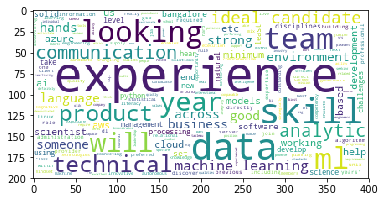

In [62]:
%matplotlib inline
docs=df['Job Description'].str.lower()
wc=WordCloud(background_color='White').generate(''.join(docs))
plt.imshow(wc)

In [81]:
jobs=df.groupby('Company Name')['Designation'].size().reset_index()
jobs.sort_values(by='Designation',ascending=False)

,Company Name,Designation
3,Amazon,2
0,Accenture,1
13,Koinex.in,1
22,Triquetro Infotech Pvt Ltd,1
21,Tredence Inc.,1
20,Sonata Software,1
19,Sling Media,1
18,RxLogix,1
17,Realtime signals,1
16,Randstad India,1


In [83]:
df.groupby("Location").size()

Location
Anekal        4
Bengaluru    21
dtype: int64

,Company Name,Location
3,Amazon,2
0,Accenture,1
13,Koinex.in,1
22,Triquetro Infotech Pvt Ltd,1
21,Tredence Inc.,1
20,Sonata Software,1
19,Sling Media,1
18,RxLogix,1
17,Realtime signals,1
16,Randstad India,1
